# Marathon Training Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("MarathonData.csv")

In [3]:
df.head(5)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


Will be converting the km data to miles per week and the speed will be converted to minute per mile.

In [4]:
df["miles_per_week"] = df["km4week"] * 0.6213712
df["miles_per_hour"] = df["sp4week"] * 0.6213712
df["mins_per_mile"] = 60 / df["miles_per_hour"] 

df.drop(columns=["Marathon", "Name", "Category", "CrossTraining", "Wall21"], inplace=True)

In [5]:
df.head()

,id,km4week,sp4week,MarathonTime,CATEGORY,miles_per_week,miles_per_hour,mins_per_mile
0,1,132.8,14.434783,2.37,A,82.518095,8.969358,6.689442
1,2,68.6,13.674419,2.59,A,42.626064,8.496890,7.061407
2,3,82.7,13.520436,2.66,A,51.387398,8.401210,7.141829
3,4,137.5,12.258544,2.68,A,85.438540,7.617106,7.877007
4,5,84.6,13.945055,2.74,A,52.568004,8.665056,6.924364


Category fields are:

- A results under 3h
- B results between 3h and 3h20m
- C results between 3h20m and 3h40m
- D results between 3h40 and 4h


In [6]:
df["CATEGORY"].value_counts()

B    28
A    21
C    21
D    17
Name: CATEGORY, dtype: int64

In [7]:
df.corr()

,id,km4week,sp4week,MarathonTime,miles_per_week,miles_per_hour,mins_per_mile
id,1.000000,-0.599675,0.162553,0.991548,-0.599675,0.162553,0.267246
km4week,-0.599675,1.000000,-0.107429,-0.606782,1.000000,-0.107429,-0.040159
sp4week,0.162553,-0.107429,1.000000,0.172294,-0.107429,1.000000,-0.697463
MarathonTime,0.991548,-0.606782,0.172294,1.000000,-0.606782,0.172294,0.259933
miles_per_week,-0.599675,1.000000,-0.107429,-0.606782,1.000000,-0.107429,-0.040159
miles_per_hour,0.162553,-0.107429,1.000000,0.172294,-0.107429,1.000000,-0.697463
mins_per_mile,0.267246,-0.040159,-0.697463,0.259933,-0.040159,-0.697463,1.000000


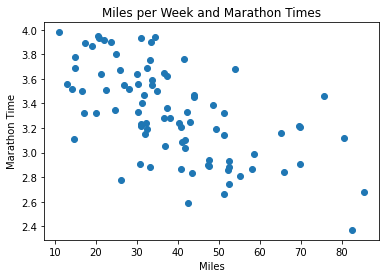

In [8]:
plt.scatter(df["miles_per_week"], df["MarathonTime"]);
plt.title("Miles per Week and Marathon Times")
plt.ylabel("Marathon Time")
plt.xlabel("Miles");

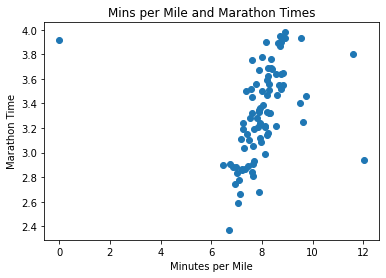

In [9]:
plt.scatter(df["mins_per_mile"], df["MarathonTime"]);
plt.title("Mins per Mile and Marathon Times")
plt.xlabel("Minutes per Mile")
plt.ylabel("Marathon Time");

From the scatter plot above, we can see 3 clear outliers. On the left, it seems like the speed data has not recorded and the right, there are 2 atheletes with around 11/12 min per miles. The median pace for category D will be used for the left outlier. The two points on the left may come from warm up and warm down speed. So that can include walking in the run. This means it will also include the "possible" walkiing miles, but the data will be left and a bayes will be used to predict categories, which is not impacted by outliers.

In [10]:
df.sort_values("mins_per_mile")[:1]

,id,km4week,sp4week,MarathonTime,CATEGORY,miles_per_week,miles_per_hour,mins_per_mile
81,82,35.6,11125.0,3.92,D,22.120815,6912.7546,0.00868


In [11]:
df["miles_per_hour"] = df["miles_per_hour"].replace([6912.7546],6.959357)
df.iloc[81]

id                        82
km4week                 35.6
sp4week                11125
MarathonTime            3.92
CATEGORY                   D
miles_per_week       22.1208
miles_per_hour       6.95936
mins_per_mile     0.00867961
Name: 81, dtype: object

Only the miles per hour value will be used for modelling. Now the two outliers on the right of the scatter plot will be changed to the median of the correct category.

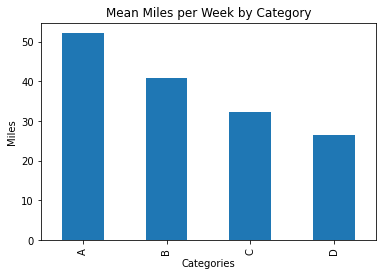

In [13]:
df.groupby("CATEGORY")["miles_per_week"].mean().plot(kind="bar");
plt.title("Mean Miles per Week by Category")
plt.xlabel("Categories")
plt.ylabel("Miles");

In [14]:
df.groupby("CATEGORY").median()

,id,km4week,sp4week,MarathonTime,miles_per_week,miles_per_hour,mins_per_mile
CATEGORY,,,,,,,
A,11.0,84.2,13.365079,2.87,52.319455,8.304675,7.224846
B,35.5,63.0,12.217755,3.22,39.146386,7.591761,7.903351
C,60.0,50.3,11.665339,3.52,31.254971,7.248505,8.277568
D,79.0,38.1,11.200000,3.89,23.674243,6.959357,8.621486


We can see category B and C don't vary too much in terms of speed and miles per week. This is because under 3 hours requires serious training, so the extra 30 mins needed from category B to C takes a lot more training and work than C to B. This can be from training plateau and only more training and time can help push through this. 

Category D has a median training time of 8.62 minutes per mile. This seems too quick considering the required time is 9 minutes per mile to reach a sub 4 hour marathon. I'm sure they would benefit more from slowing down the pace and increasing the weekly miles, this can be easier on the body and is a patient effective way to train.

In [15]:
df.groupby("CATEGORY")[["miles_per_week", "MarathonTime"]].describe()

miles_per_week                                              \
                  count       mean        std        min        25%   
CATEGORY                                                              
A                  21.0  52.233647  14.929773  26.221865  43.495984   
B                  28.0  40.828526  15.692708  14.788635  31.829740   
C                  21.0  32.394152  13.667149  12.862384  25.849042   
D                  17.0  26.474068  10.998610  11.122544  19.013959   

                                          MarathonTime                      \
                50%        75%        max        count      mean       std   
CATEGORY                                                                     
A         52.319455  58.098207  85.438540         21.0  2.815714  0.142393   
B         39.146386  44.583384  80.529708         28.0  3.216071  0.092470   
C         31.254971  36.723038  75.620875         21.0  3.534286  0.080472   
D         23.674243  33.305496  54.059294         17.0  3.844706  0.101496   

                                          
           min     25%   50%   75%   max  
CATEGORY                                  
A         2.37  2.7800  2.87  2.90  2.99  
B         3.04  3.1475  3.22  3.29  3.36  
C         3.39  3.4700  3.52  3.59  3.67  
D         3.68  3.7600  3.89  3.93  3.98

In [16]:
group_a = df[df["CATEGORY"] == "A"]
group_b = df[df["CATEGORY"] == "B"]

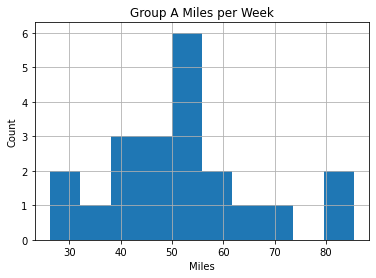

In [17]:
group_a.hist("miles_per_week");
plt.title("Group A Miles per Week")
plt.ylabel("Count")
plt.xlabel("Miles");

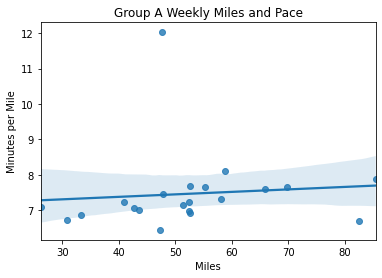

In [18]:
sns.regplot(x="miles_per_week", 
           y="mins_per_mile", 
           data=group_a)
plt.title("Group A Weekly Miles and Pace")
plt.ylabel("Minutes per Mile")
plt.xlabel("Miles");

We can see a from the plot above with a linear regression line, that the atheletes are slowing down their miles as the training volume increases.

In [19]:
group_a_5_least = group_a.sort_values("miles_per_week")[:5]

In [20]:
group_a_5_least[["miles_per_week", "miles_per_hour", "mins_per_mile"]].mean()

miles_per_week    34.759505
miles_per_hour     8.583065
mins_per_mile      6.994929
dtype: float64

This is the mean training data for 5 atheletes in group A with the least amount of miles over the 4 weeks prior to the race. So this could be taken as a rough minimum requirement to run a sub 3 hour, though from the previous data, it seems like around 50 miles per week would be needed. This 4 week data, most likely includes a "taper" week or two. In sport, that means cutting down training intensity and volume 1-2 weeks prior to the event. So without all of the athelete's training data, we can only predict what the 4 weeks prior need to look like. We will never be able to know the athelete's base fitness/training without this.

To prevent injuries, I would prefer to run at around 8-8.25 mins per mile. So let's look at the difference between this and 6.99 mins per mile and try to see roughly how many miles would be needed to be made up in order to balance out the slower pace.

In [21]:
difference = 8.25 / 6.994929 * 100
print("I want to run {}% slower than the mean running times.".format(round(difference - 100, 2)))

I want to run 17.94% slower than the mean running times.


In [22]:
miles_adjusted = 34.759505 * 1.1794
print("Estimated miles needed to run per week: {}".format(round(miles_adjusted, 2)))

Estimated miles needed to run per week: 41.0


In [23]:
df.to_csv("cleaned_marathon.csv")